In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Data Loading

In [2]:
nanotox_df = pd.read_csv('toxicity/nanotox_dataset.csv')
nanotox_df.head()

,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class
0,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.001,1.61,3,nonToxic
1,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.010,1.61,3,nonToxic
2,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.100,1.61,3,nonToxic
3,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,1.000,1.61,3,nonToxic
4,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,5.000,1.61,3,nonToxic


In [3]:
nanotox_df.tail()

,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class
876,ZnO,45.3,310.0,32.7,21.3,-3.89,24,20.0,1.65,1,Toxic
877,ZnO,32.0,1093.0,21.6,37.0,-3.89,24,25.0,1.65,1,Toxic
878,ZnO,46.3,239.0,42.8,24.1,-5.17,12,100.0,1.90,1,Toxic
879,ZnO,35.6,295.5,-41.6,27.9,-3.89,24,10.0,1.65,1,Toxic
880,ZnO,46.3,239.0,42.8,24.1,-5.17,24,100.0,1.90,1,Toxic


In [4]:
print('Null counts:')
print(nanotox_df.isna().sum())

Null counts:
NPs           0
coresize      0
hydrosize     0
surfcharge    0
surfarea      0
Ec            0
Expotime      0
dosage        0
e             0
NOxygen       0
class         0
dtype: int64


- This particular dataset has over 400 duplicated examples, this will cause issues when modeling by introducing bias.

In [5]:
print('\nDuplicate rows:')
print(nanotox_df.duplicated().sum())
nanotox_df = nanotox_df.drop_duplicates()


Duplicate rows:
487


- Resetting the index after dropping duplicates

In [6]:
nanotox_df = nanotox_df.reset_index(drop=True)

In [134]:
print('Data Types:')
nanotox_df.info()

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NPs         394 non-null    object 
 1   coresize    394 non-null    float64
 2   hydrosize   394 non-null    float64
 3   surfcharge  394 non-null    float64
 4   surfarea    394 non-null    float64
 5   Ec          394 non-null    float64
 6   Expotime    394 non-null    int64  
 7   dosage      394 non-null    float64
 8   e           394 non-null    float64
 9   NOxygen     394 non-null    int64  
 10  class       394 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 34.0+ KB


### Descriptive Statistics
- This dataset contains several numerical features which vary quite a bit in their scales. Some are very small such as dosage, some are larde such as hydrosize. We may have to try out some scaling strategies to reduce the bias.

In [135]:
nanotox_df.describe()

,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,52.237310,580.037056,2.135939,48.960406,-4.002157,26.010152,30.890783,1.639746,1.489848
std,31.703193,417.022801,25.740428,49.597494,0.661252,19.950955,40.281802,0.097320,0.658589
min,7.500000,74.000000,-41.600000,7.000000,-5.170000,3.000000,0.000010,1.540000,1.000000
25%,32.000000,273.400000,-11.700000,20.000000,-4.160000,12.000000,1.560000,1.540000,1.000000
50%,42.500000,329.000000,-9.300000,37.000000,-3.890000,24.000000,15.000000,1.650000,1.000000
75%,86.000000,795.000000,29.400000,64.700000,-3.890000,24.000000,50.000000,1.650000,2.000000
max,125.000000,1843.000000,42.800000,210.000000,-1.510000,72.000000,300.000000,1.900000,3.000000


In [8]:
print('\nChemical compound counts:')
print(nanotox_df['NPs'].value_counts())


Chemical compound counts:
NPs
ZnO      198
TiO2     123
CuO       37
Al2O3     18
Fe2O3     18
Name: count, dtype: int64


- We have 2 categorical features (NPs, class). Since NPs contains the chemical compound names, they are not useful in the model. We can drop this column entirely from the dataset. However, since we only have 5 different chemical compounds I will opt for one-hot encoding instead. As for the class, we will cast this to values 1: Toxic, 0: nonToxic.

- After dropping the duplicate rows, we see now this dataset is quite imbalanced since there are significantly more nonToxic nanoparticles than there are Toxic nanoparticles. We may have to do something about this later.

<Axes: xlabel='NPs', ylabel='count'>

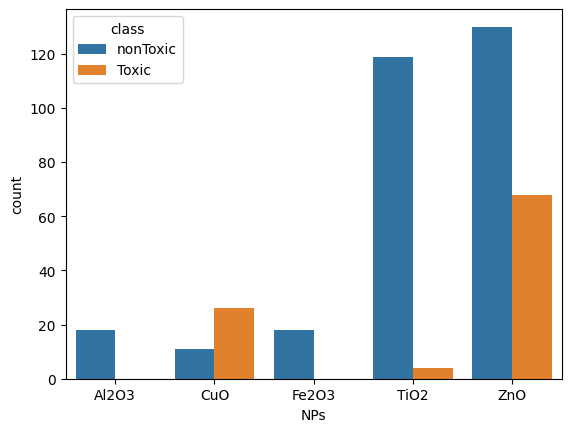

In [ ]:
sns.countplot(nanotox_df, x='NPs', hue='class')

- By visualizing the distributions of each feature we can see how much they overlap and get a sense of their separability across the 2 classes

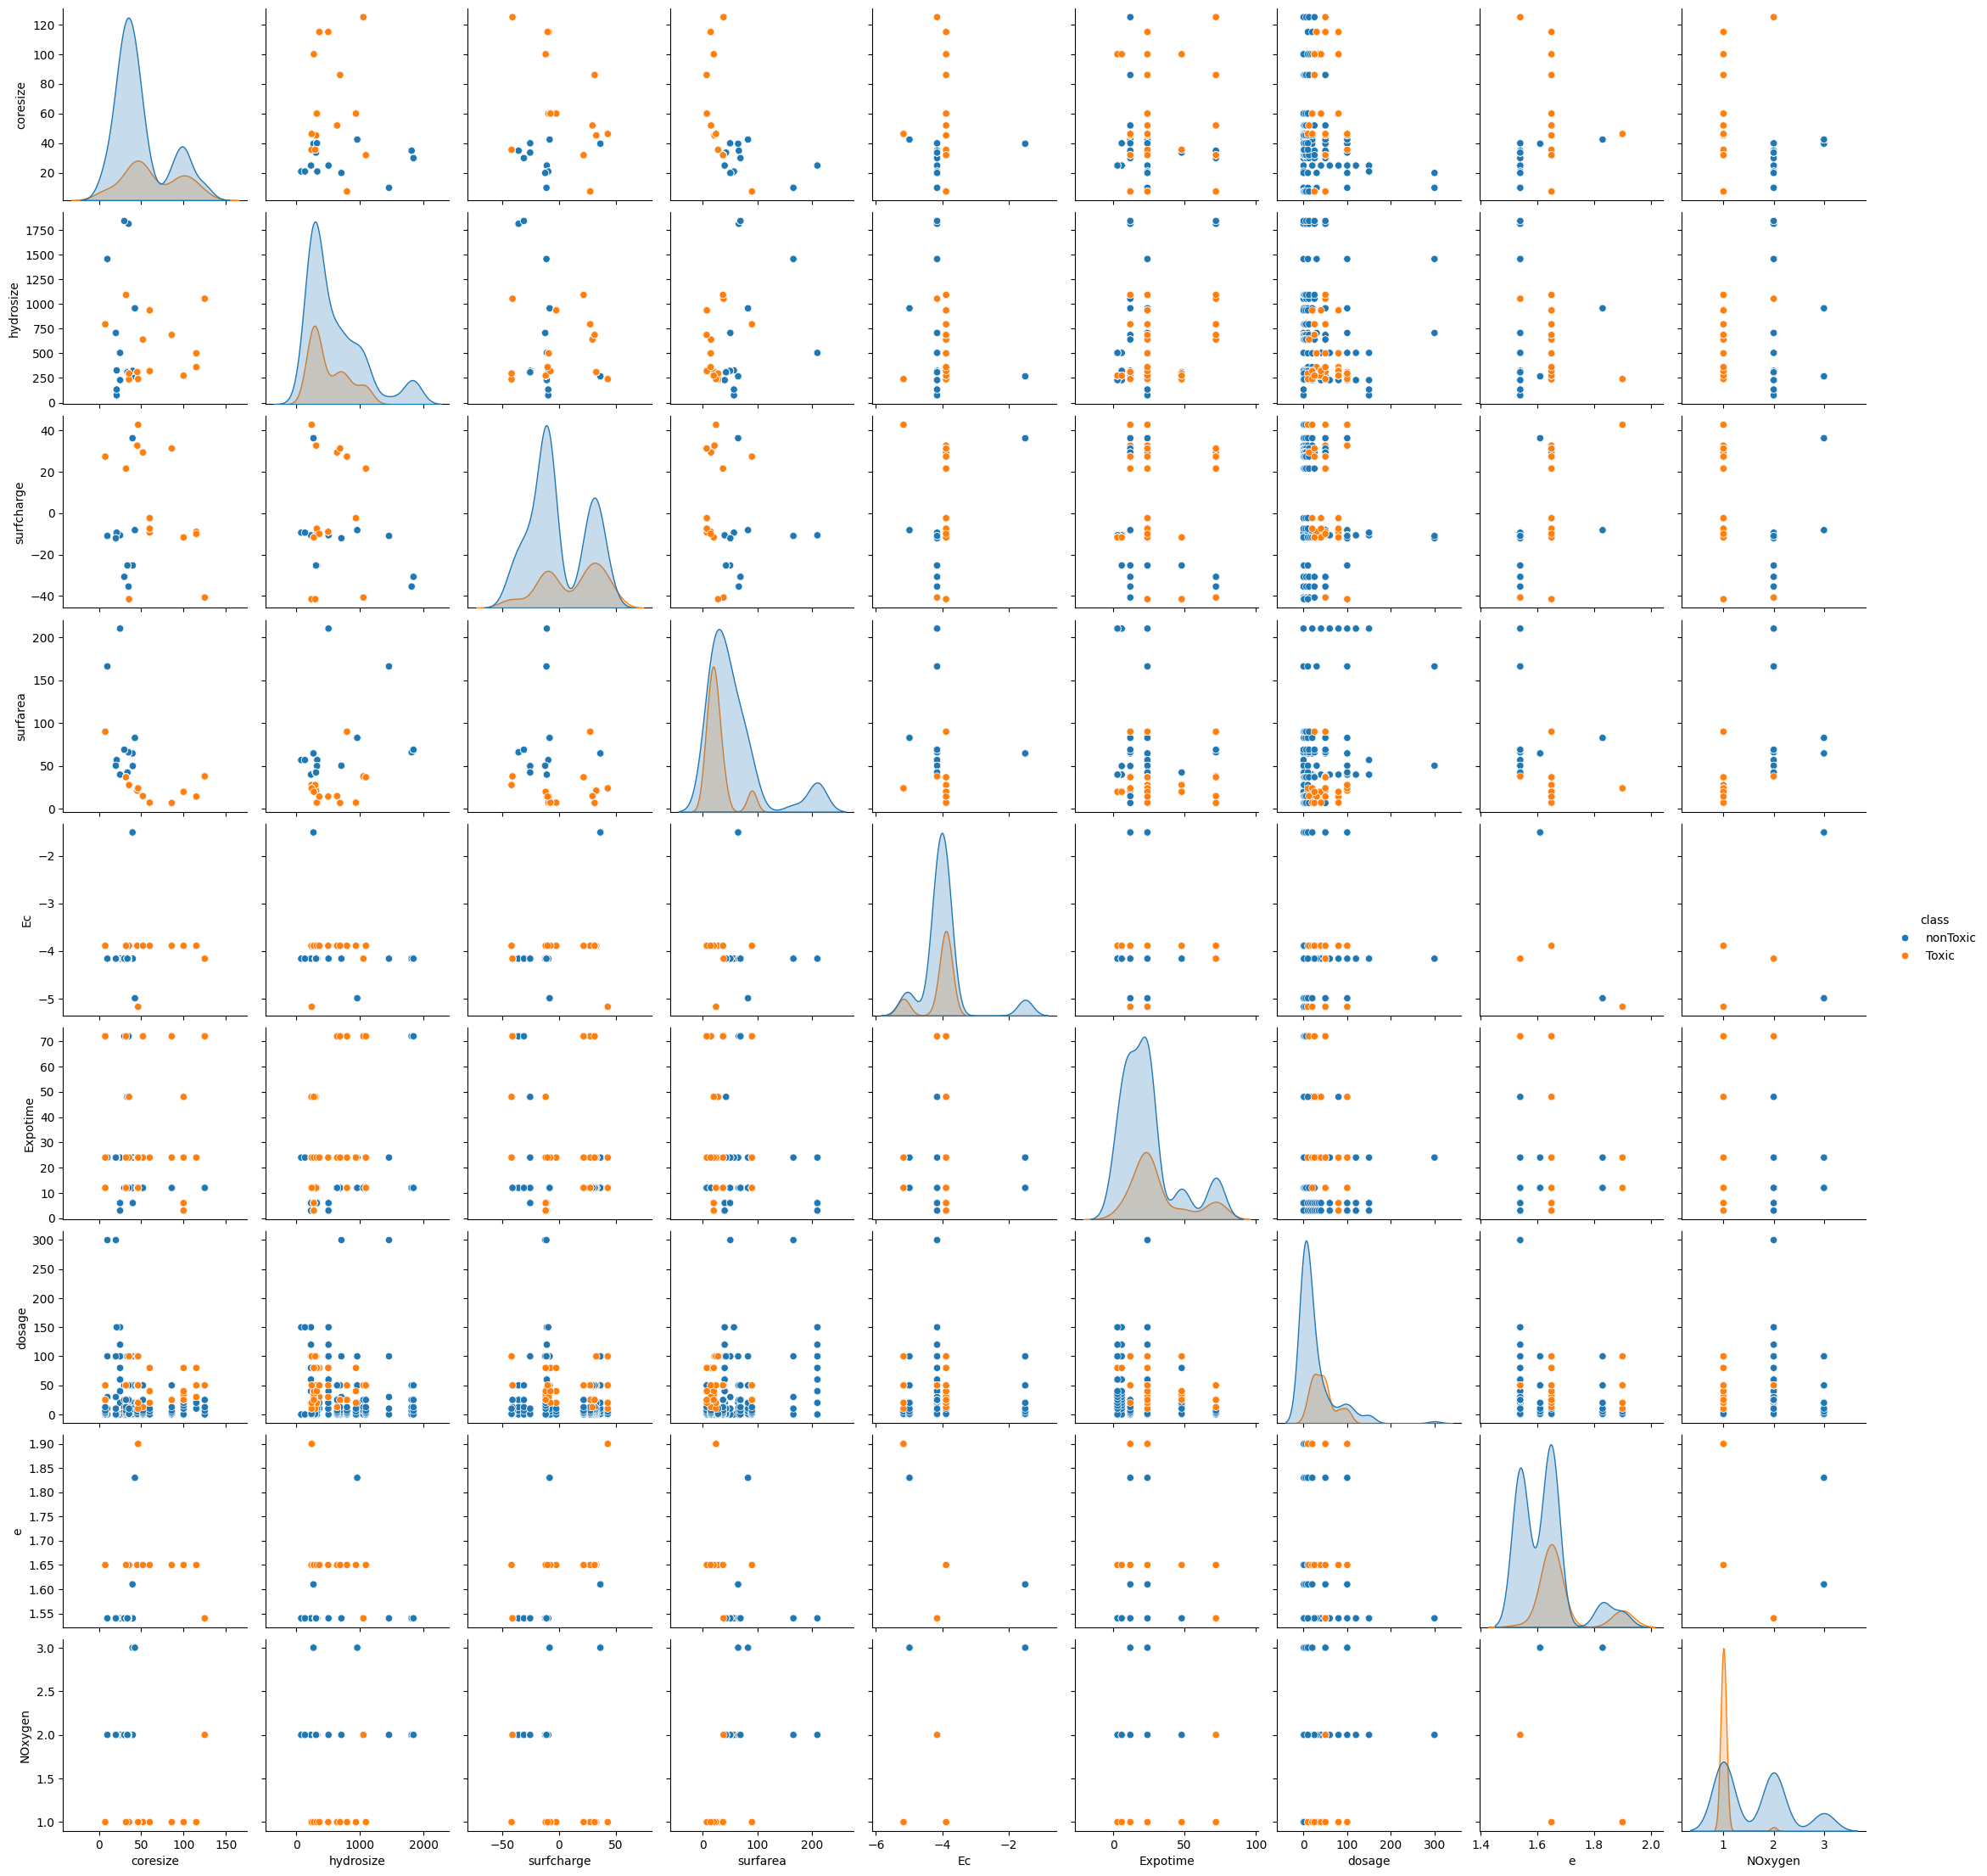

In [194]:
sns.pairplot(nanotox_df, hue='class')

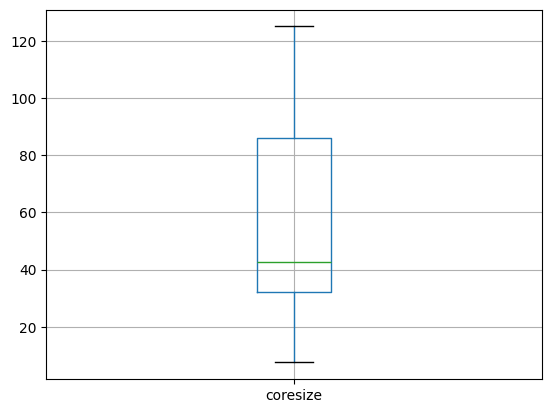

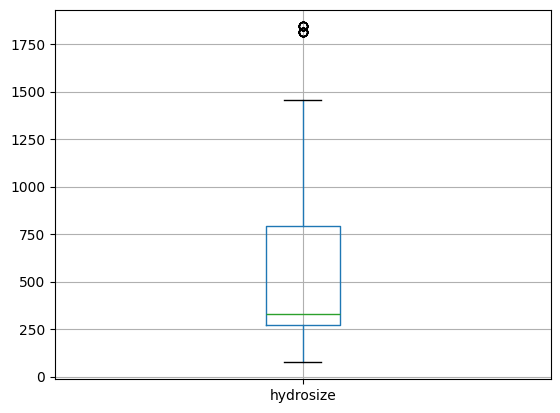

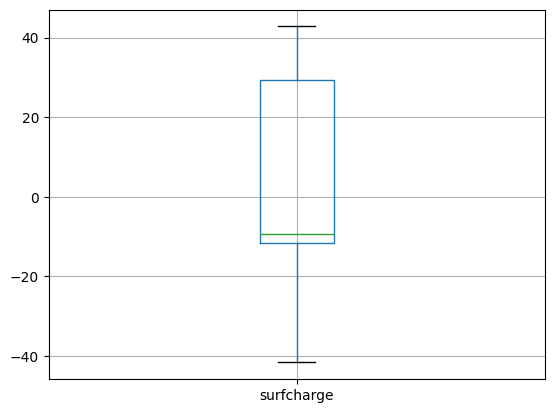

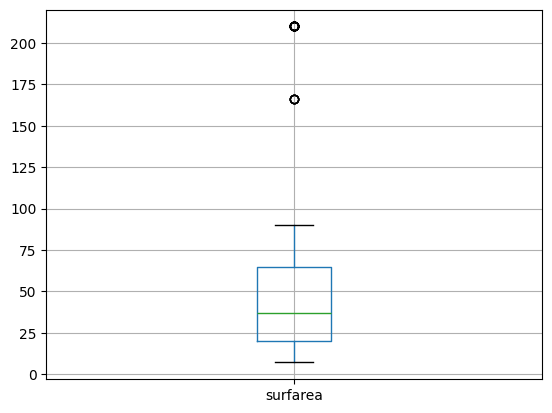

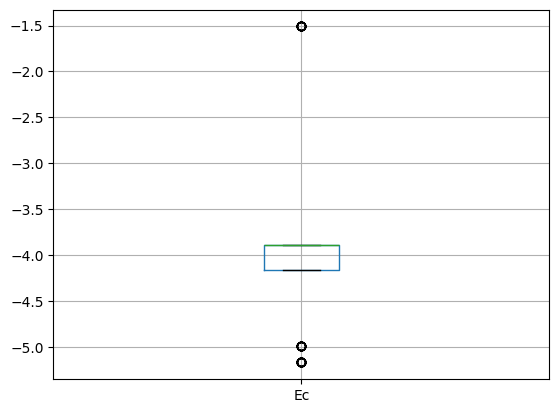

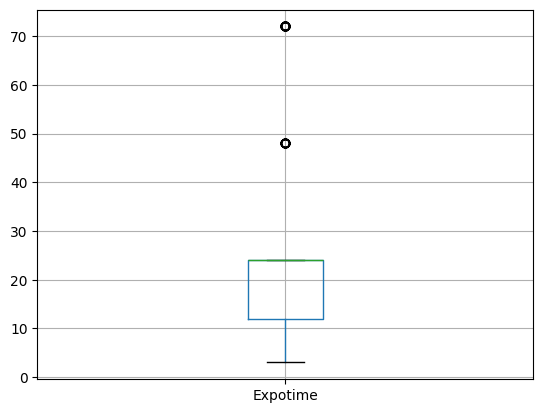

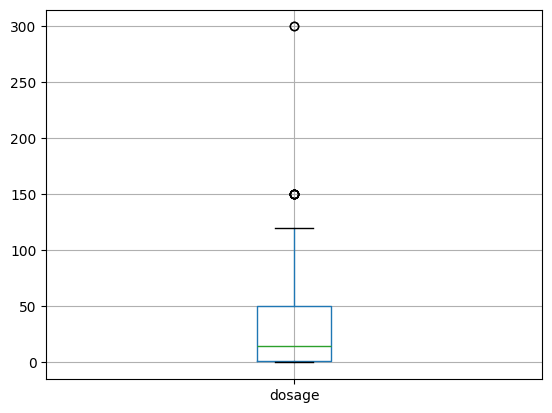

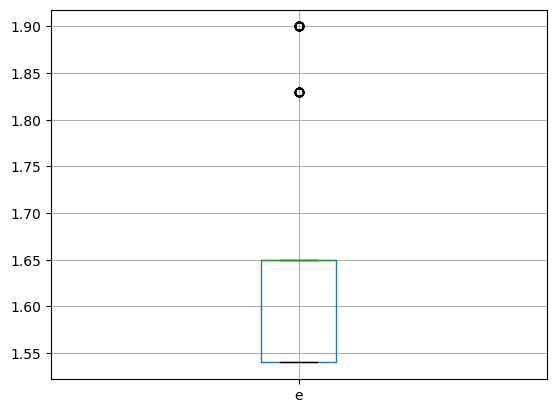

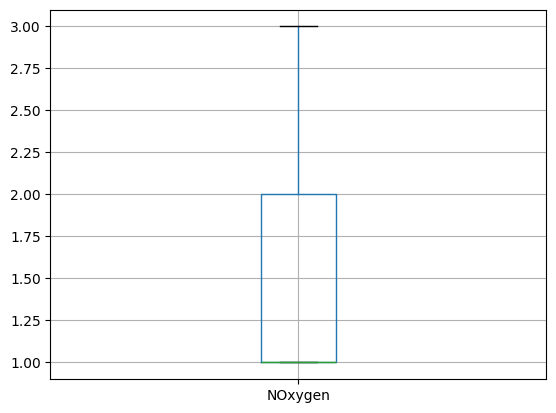

<Figure size 640x480 with 0 Axes>

In [176]:
for col in nanotox_df:
    if col not in ['NPs', 'class']:
        nanotox_df.boxplot(col)
        plt.show()
plt.tight_layout()

## Modeling

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

- Run the next cell if you want to supress warnings given by crossvalidation

In [199]:
import warnings
warnings.filterwarnings('ignore')

- Separating target variable from features

In [200]:
X = nanotox_df.drop(columns='class')
y = nanotox_df['class']
y = y.map({'Toxic': 1, 'nonToxic': 0})

In [201]:
cat_cols = X.select_dtypes(include=['object']).columns.to_list()
num_cols = X.select_dtypes(exclude=['object']).columns.to_list()

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Making pipelines for streamlining cross-validation of different parameters

In [203]:
preprocess = ColumnTransformer(
    transformers=[
        ("numeric", StandardScaler(), num_cols),
        ("category", OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
    ],
    remainder="drop",
)

clf_lr = Pipeline([
    ("preprocess", preprocess),
    ("clf",LogisticRegression())
])

clf_rf = Pipeline([
    ("preprocess", preprocess),
    ("clf",RandomForestClassifier())
])

clf_sv = Pipeline([
    ("preprocess", preprocess),
    ("clf",SVC())
])


- Parameter grid for cross validation

In [204]:
param_grid = {
    'clf_lr':{
        'preprocess__numeric':[StandardScaler(), MinMaxScaler(), RobustScaler(), None],
        'preprocess__category':[OneHotEncoder(handle_unknown='ignore', sparse_output=False), None],
        'clf__penalty': ['l1','l2', None],
        'clf__class_weight': ['balanced',{0: 1, 1:2}, {0: 1, 1:3}, {0: 1, 1:4}, None],
        'clf__solver': ['liblinear', 'newton-cholesky', 'lbfgs'],
        'clf__max_iter': [500, 1000, 1500]
    },
    'clf_rf': {
        'preprocess__numeric':[StandardScaler(), MinMaxScaler(), RobustScaler(), None],
        'preprocess__category':[OneHotEncoder(handle_unknown='ignore', sparse_output=False), None],
        'clf__n_estimators': [100, 200, 300, 400],
        'clf__max_depth': [5, 10, 20, 30],
        'clf__class_weight': ['balanced', 'balanced_subsample', {0: 1, 1:2}, {0: 1, 1:3}, {0: 1, 1:4}, None],
        'clf__max_features': ['sqrt', 'log2']
    },
    'clf_sv':{
        'preprocess__numeric':[StandardScaler(), MinMaxScaler(), RobustScaler(), None],
        'preprocess__category':[OneHotEncoder(handle_unknown='ignore', sparse_output=False), None],
        'clf__C': [0.5, 1.0, 1.5, 2.0, 2.5],
        'clf__kernel': ['poly', 'rbf'],
        'clf__degree': [2, 3, 4, 5],
        'clf__gamma': ['scale', 'auto']
    }
}


In [205]:
def fit_eval(model, param_grid, X_train, y_train, X_test, y_test, folds, scoring):

    name = type(model[1]).__name__
    clf = GridSearchCV(model, 
                       param_grid=param_grid, 
                       error_score=np.nan, 
                       verbose=1, 
                       cv=folds, 
                       scoring=scoring,
                       refit=True)
    clf.fit(X_train, y_train)

    y_score = clf.predict_proba(X_test)[:,1] if hasattr(model, 'predict_proba') else clf.decision_function(X_test)

    y_pred = clf.predict(X_test)
    auc = round(roc_auc_score(y_test, y_pred),3)
    
    print(f'\n==={name}===')
    print('\nBest Parameters:')
    print(clf.best_params_)
    print(f'\nAUC: {auc}')
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    plt.show()

    return {'name':name, 'y_score':y_score, 'auc':auc}

NOTE: Training may take a while

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits

===LogisticRegression===

Best Parameters:
{'clf__class_weight': {0: 1, 1: 4}, 'clf__max_iter': 500, 'clf__penalty': 'l2', 'clf__solver': 'liblinear', 'preprocess__category': OneHotEncoder(handle_unknown='ignore', sparse_output=False), 'preprocess__numeric': MinMaxScaler()}

AUC: 0.828
              precision    recall  f1-score   support

           0       0.96      0.77      0.86        62
           1       0.52      0.88      0.65        17

    accuracy                           0.80        79
   macro avg       0.74      0.83      0.75        79
weighted avg       0.86      0.80      0.81        79



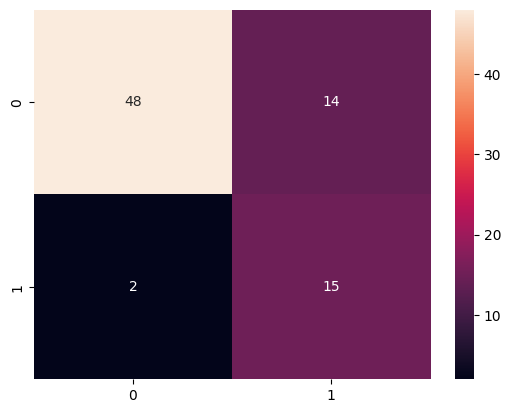

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits

===RandomForestClassifier===

Best Parameters:
{'clf__class_weight': {0: 1, 1: 4}, 'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__n_estimators': 200, 'preprocess__category': OneHotEncoder(handle_unknown='ignore', sparse_output=False), 'preprocess__numeric': MinMaxScaler()}

AUC: 0.976
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        62
           1       0.85      1.00      0.92        17

    accuracy                           0.96        79
   macro avg       0.93      0.98      0.95        79
weighted avg       0.97      0.96      0.96        79



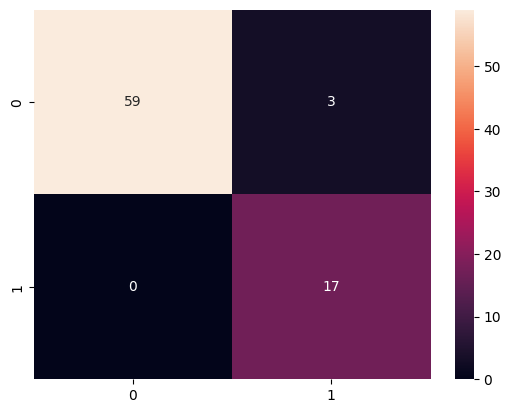

Fitting 5 folds for each of 640 candidates, totalling 3200 fits

===SVC===

Best Parameters:
{'clf__C': 2.0, 'clf__degree': 2, 'clf__gamma': 'auto', 'clf__kernel': 'rbf', 'preprocess__category': OneHotEncoder(handle_unknown='ignore', sparse_output=False), 'preprocess__numeric': StandardScaler()}

AUC: 0.874
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        62
           1       0.93      0.76      0.84        17

    accuracy                           0.94        79
   macro avg       0.93      0.87      0.90        79
weighted avg       0.94      0.94      0.93        79



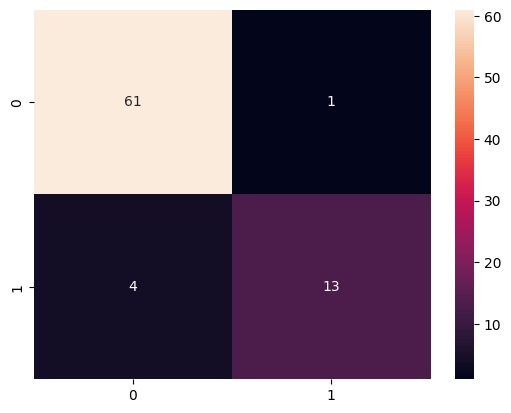

In [206]:
results = []
results.append(fit_eval(clf_lr, param_grid['clf_lr'], X_train, y_train, X_test, y_test, folds=5, scoring='recall'))
results.append(fit_eval(clf_rf, param_grid['clf_rf'], X_train, y_train, X_test, y_test, folds=5, scoring='recall'))
results.append(fit_eval(clf_sv, param_grid['clf_sv'], X_train, y_train, X_test, y_test, folds=5, scoring='recall'))

#### Plotting the ROC Curves for all models

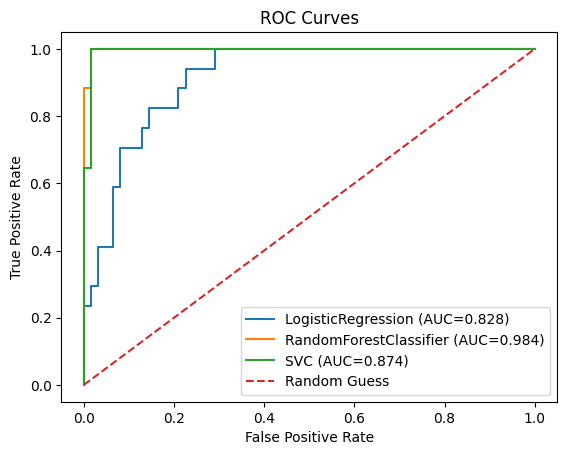

In [187]:
for result in results:
    fpr, tpr, _ = roc_curve(y_test, result['y_score'], pos_label=1)
    plt.plot(fpr, tpr, label=f"{result['name']} (AUC={result['auc']})")

plt.plot([0,1],[0,1],label="Random Guess", linestyle='dashed')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
    